# Predicting review ranking on specific conditions of Drugs.com

## Introduction
The goal for this project is to study the overall data set regarding the drug name and the conditions as well as the prediction of the rating for the reviews written by the patients. We do the latter by performing Machine Learning techniques and by analyzing the rating of the reviews of drug experience for the four mostly reviewed conditions.

### Data Set Information:
In this Capstone project, the goal is to understand Drug Rating from the analysis of the text from the review feature of the drug data set available on drugs.com. We extract over 200000 records of drug data with 6 features, including drug names, condition of the disease and patient reviews on specific drugs along with related conditions on a 10 star rating reflecting patient satisfaction. The data set provided by drugs.com came in two portions of test and train sets, a 75% train set and a 25% test set partition, which we had to combine in order to get the full data set so we could start cleaning.

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn
import scipy as sp
import math
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 200
%matplotlib inline
#import contractions
import unicodedata
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
#from matplotlib import pyplot
import pylab
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm
from scipy import stats
from statsmodels.stats.weightstats import ztest
from matplotlib import rcParams
import xlrd
import csv  
import os

In [7]:
df = open(os.path.expanduser('~/Downloads/drugsCom_raw/drugsComTest_raw.tsv'))  
df1 = open(os.path.expanduser('~/Downloads/drugsCom_raw/drugsComTrain_raw.tsv'))  


In [10]:
df = pd.read_csv(df, sep="\t")
df1 = pd.read_csv(df1, sep="\t")

In [11]:
df2 = df.append(df1)
list(df2)

['Unnamed: 0',
 'drugName',
 'condition',
 'review',
 'rating',
 'date',
 'usefulCount']

+ On the cleaning phase, it was basically the merging and re_indexing of the data that is the main thing and the rest of the data was pretty clean in other aspects.


In [12]:
df2.reset_index(drop=True).head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over the years (citalopram, fluoxetine, amitriptyline), but none of those helped with my depression, insomnia &amp; anxiety. My doctor suggested and changed ...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done very well on the Asacol. He has no complaints and shows no side effects. He has taken as many as nine tablets per day at one time. I&#039;ve been v...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for alcohol, smoking, and opioid cessation. People lose weight on it because it also helps control over-eating. I have no doubt that most obesity is caused ...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cycle. After reading some of the reviews on this type and similar birth controls I was a bit apprehensive to start. Im giving this birth control a 9 out ...",9.0,"October 22, 2015",4


### Exploratory Data Analysis
Here, we are getting to know our data set in terms of its associated features. We explore the data types of each feature as well as counts of different drug names and conditions.

In [13]:
df2.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [14]:
df2.dtypes

Unnamed: 0       int64
drugName        object
condition       object
review          object
rating         float64
date            object
usefulCount      int64
dtype: object

In [15]:
df1.dtypes

Unnamed: 0       int64
drugName        object
condition       object
review          object
rating         float64
date            object
usefulCount      int64
dtype: object

In [16]:
df.dtypes

Unnamed: 0       int64
drugName        object
condition       object
review          object
rating         float64
date            object
usefulCount      int64
dtype: object

In [17]:
df.drugName.value_counts().head(15)

Levonorgestrel                        1273
Etonogestrel                          1085
Ethinyl estradiol / norethindrone      903
Nexplanon                              736
Ethinyl estradiol / norgestimate       673
Ethinyl estradiol / levonorgestrel     615
Phentermine                            542
Sertraline                             508
Escitalopram                           455
Mirena                                 431
Implanon                               404
Gabapentin                             368
Bupropion                              347
Miconazole                             344
Duloxetine                             322
Name: drugName, dtype: int64

In [18]:
df['condition'].value_counts()[:10]

Birth Control      9648
Depression         3095
Pain               2100
Anxiety            1908
Acne               1847
Bipolar Disorde    1380
Weight Loss        1248
Insomnia           1231
Obesity            1189
ADHD               1126
Name: condition, dtype: int64

In [19]:
df1['condition'].value_counts()[:10]

Birth Control      28788
Depression          9069
Pain                6145
Anxiety             5904
Acne                5588
Bipolar Disorde     4224
Insomnia            3673
Weight Loss         3609
Obesity             3568
ADHD                3383
Name: condition, dtype: int64

In [20]:
df2['condition'].value_counts()[:10]

Birth Control      38436
Depression         12164
Pain                8245
Anxiety             7812
Acne                7435
Bipolar Disorde     5604
Insomnia            4904
Weight Loss         4857
Obesity             4757
ADHD                4509
Name: condition, dtype: int64

+ Investigating the ratio of Birth Control in the test, train and the entire data set.


In [21]:
df2t = len(df2.condition)

In [22]:
cbc = len(df2[df2['condition'] == 'Birth Control'] )
#df2[df2['condition']=='Birth Control']

In [23]:
print("Ratio of the number of Birth Control to the entire data set: " + str(cbc/df2t))

Ratio of the number of Birth Control to the entire data set: 0.1787197239878547


In [24]:
df1t = len(df1.condition)
cbc1 = len(df1[df1['condition'] == 'Birth Control'] )
print("Ratio of the number of Birth Control to the entire data set: " + str(cbc1/df1t))

Ratio of the number of Birth Control to the entire data set: 0.1784782110020645


In [25]:
dft = len(df.condition)
cbc0 = len(df[df['condition'] == 'Birth Control'] )
print("Ratio of the number of Birth Control to the entire data set: " + str(cbc0/dft))

Ratio of the number of Birth Control to the entire data set: 0.17944425845329762


+ Checking to see the Drug names counts in the test and the entire data set:


In [26]:
df1.drugName.value_counts().head(15)

Levonorgestrel                        3657
Etonogestrel                          3336
Ethinyl estradiol / norethindrone     2850
Nexplanon                             2156
Ethinyl estradiol / norgestimate      2117
Ethinyl estradiol / levonorgestrel    1888
Phentermine                           1543
Sertraline                            1360
Escitalopram                          1292
Mirena                                1242
Implanon                              1102
Gabapentin                            1047
Bupropion                             1022
Venlafaxine                           1016
Miconazole                            1000
Name: drugName, dtype: int64

In [27]:
df2.drugName.value_counts().head(15)

Levonorgestrel                        4930
Etonogestrel                          4421
Ethinyl estradiol / norethindrone     3753
Nexplanon                             2892
Ethinyl estradiol / norgestimate      2790
Ethinyl estradiol / levonorgestrel    2503
Phentermine                           2085
Sertraline                            1868
Escitalopram                          1747
Mirena                                1673
Implanon                              1506
Gabapentin                            1415
Bupropion                             1369
Miconazole                            1344
Venlafaxine                           1338
Name: drugName, dtype: int64

In [28]:
df2.condition.value_counts().head(15)

Birth Control                38436
Depression                   12164
Pain                          8245
Anxiety                       7812
Acne                          7435
Bipolar Disorde               5604
Insomnia                      4904
Weight Loss                   4857
Obesity                       4757
ADHD                          4509
Diabetes, Type 2              3362
Emergency Contraception       3290
High Blood Pressure           3104
Vaginal Yeast Infection       3085
Abnormal Uterine Bleeding     2744
Name: condition, dtype: int64

+ As we can see, the rating of the Drugs seems to be bi-modal; namely, it is mostly populated in the 9 and 10 ratings as well as 1. This means that patients review drugs either when they really like a certain drug or completely dislike it.

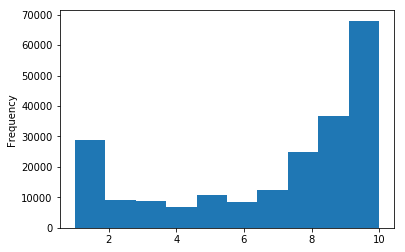

In [29]:
# Histogram of Rating: 

df2['rating'].plot(kind = 'hist')

In [30]:
df2.usefulCount.describe()  #is the count here the number of rows? 215063? yes


count    215063.000000
mean         28.001004
std          36.346069
min           0.000000
25%           6.000000
50%          16.000000
75%          36.000000
max        1291.000000
Name: usefulCount, dtype: float64

In [32]:
df2[df2['usefulCount']!= 0].head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over the years (citalopram, fluoxetine, amitriptyline), but none of those helped with my depression, insomnia &amp; anxiety. My doctor suggested and changed ...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done very well on the Asacol. He has no complaints and shows no side effects. He has taken as many as nine tablets per day at one time. I&#039;ve been v...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for alcohol, smoking, and opioid cessation. People lose weight on it because it also helps control over-eating. I have no doubt that most obesity is caused ...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cycle. After reading some of the reviews on this type and similar birth controls I was a bit apprehensive to start. Im giving this birth control a 9 out ...",9.0,"October 22, 2015",4


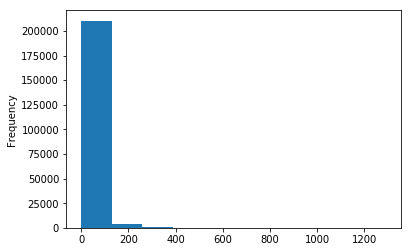

In [33]:
#'number of users who found review useful' 
#We need to plot graph of rating vs usefulcount to see any correlation 

df2['usefulCount'].plot(kind = 'hist')

In [34]:
len(df2['usefulCount'][df2['usefulCount']>0])


206661

In [35]:
len(df2['usefulCount'][df2['usefulCount'] == 0])


8402

In [36]:
len(df2['usefulCount'])


215063

In [37]:
# so we zeros for the userCount
len(df2['usefulCount']) - len(df2['usefulCount'][df2['usefulCount']>0])


8402

+ Logarithm of number of people who found a review useful is noramlly distributed.


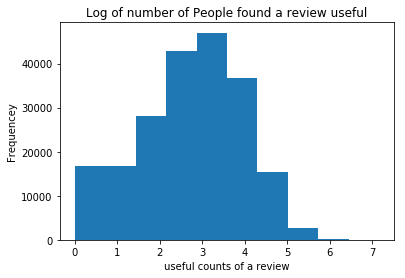

In [38]:
plt.hist(np.log(df2['usefulCount'][df2['usefulCount']>0])) #when in doubt take a log! lol 
                                                            # and it's a normal distribution!
    # the usegful count by itself is very skewed but the log tranform of it makes it noraml distributed
plt.title("Log of number of People found a review useful")
plt.xlabel("useful counts of a review") 
plt.ylabel("Frequencey")
plt.show()

+ Histogram of less than 100 useful count (people who find a review useful) on a review:


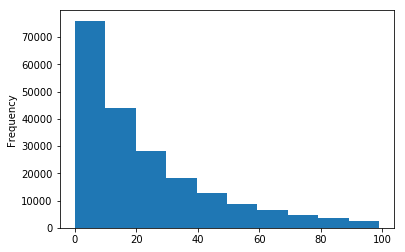

In [39]:
df2[df2['usefulCount']<100]['usefulCount'].plot(kind='hist') 
#df2['usefulCount'][df2['usefulCount']<100].plot(kind='hist') either works are these 2 lines always give identical answers?

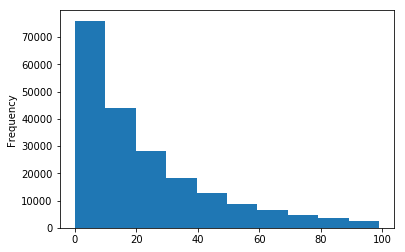

In [40]:
df2['usefulCount'][df2['usefulCount']<100].plot(kind='hist')

In [41]:
df2[['usefulCount', 'rating']][df2['usefulCount']<200].head()  #.plot(kind='scatter', x = df2.rating, y = 'usefulCount')

,usefulCount,rating
0,22,10.0
1,17,8.0
2,3,9.0
3,35,9.0
4,4,9.0


This is a graph of Rating of the reviews on the reviews that the users found useful. We chose a section of the count (less than 200) to make the graph less cluttered and more informative. Although it really didn't help much.

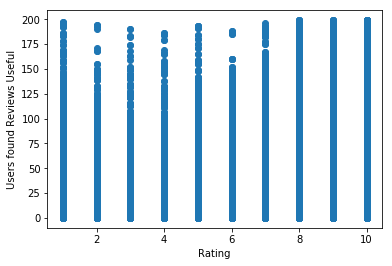

In [42]:
df3 = df2[['usefulCount', 'rating']][df2['usefulCount']<200]
plt.scatter( y = df3.usefulCount, x= df3.rating)
plt.xlabel('Rating')
plt.ylabel('Users found Reviews Useful')
plt.show()

People who have found a review useful seems to be more populated around very good review ratings (8 through 10)



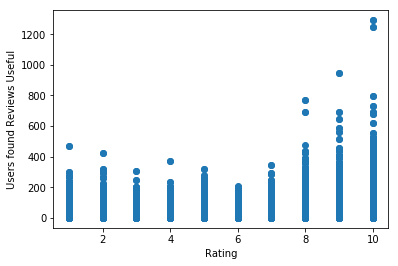

In [43]:
plt.scatter('rating', 'usefulCount',  data= df2) 
plt.xlabel('Rating')
plt.ylabel('Users found Reviews Useful')
plt.show()

The following is various violin plots for the rating of the drugs and the number of people who found them useful.



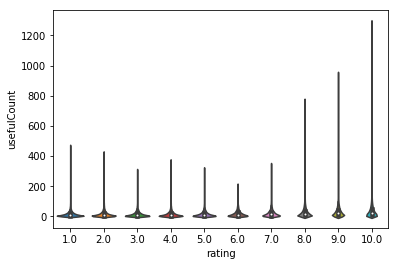

In [44]:
#sns.set(style="whitegrid")   
ax = sns.violinplot(x="rating", y = "usefulCount" , data=df2)

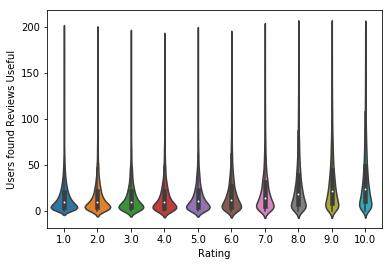

In [45]:
#df3 = df2[['usefulCount', 'rating']][df2['usefulCount']<200]
sns.violinplot( y = df3.usefulCount, x= df3.rating)
plt.xlabel('Rating')
plt.ylabel('Users found Reviews Useful')
plt.show()

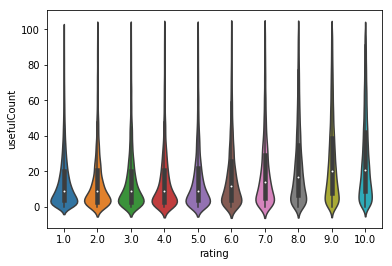

In [46]:
useful = df2[df2['usefulCount']<100]  # <50
type(useful)
sns.violinplot(x="rating", y = useful.usefulCount , data=useful)

##### In this part of the exploratory data analysis, we are visualizing the counts for drug names, the fisrt 40 drugs, first 10 drugs, etc.¶


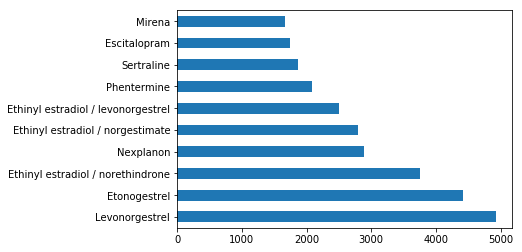

In [47]:
df2['drugName'].value_counts()[:10].plot(kind='barh')


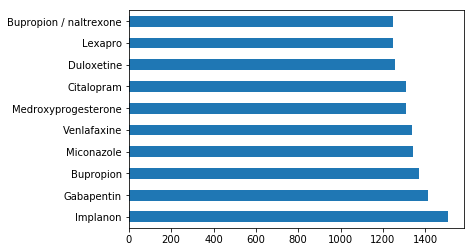

In [48]:
df2['drugName'].value_counts()[10:20].plot(kind='barh')


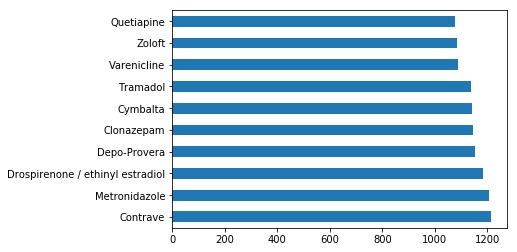

In [49]:
df2['drugName'].value_counts()[20:30].plot(kind='barh')


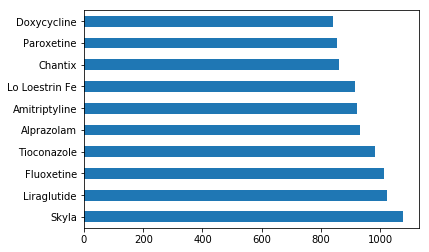

In [50]:
df2['drugName'].value_counts()[30:40].plot(kind='barh')


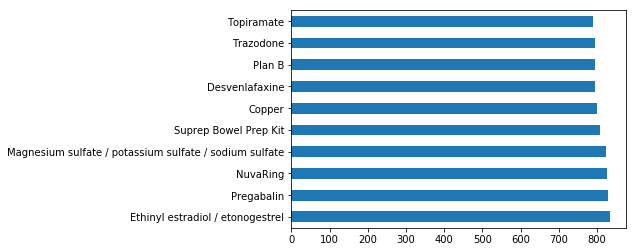

In [51]:
df2['drugName'].value_counts()[40:50].plot(kind='barh')



##### In this part of the exploratory data analysis, we are visualizing the counts for the conditions in the data set.
As we can see, Birth Control is the highest count for the conditions, followed by Depression, Pain and Anxiety.

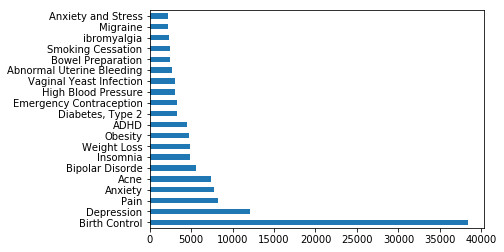

In [52]:
df2['condition'].value_counts()[:20].plot(kind='barh')


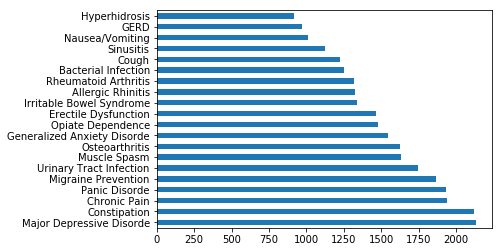

In [53]:
df2['condition'].value_counts()[20:40].plot(kind='barh')


In [54]:
df2['condition'].value_counts()[:10]

Birth Control      38436
Depression         12164
Pain                8245
Anxiety             7812
Acne                7435
Bipolar Disorde     5604
Insomnia            4904
Weight Loss         4857
Obesity             4757
ADHD                4509
Name: condition, dtype: int64

### What are the first 10 drug names for Birth Control?
In order to find the first 10 mostly used for Birth Contrl, we first perform a little bit of ETA on the Birth Control condition in our data set and then we go about listing the first 10 mostly used Birth Control drugs.

In [55]:
cond_bc = df2[df2['condition']=='Birth Control'] 
print(cond_bc.head(10))

    Unnamed: 0                          drugName      condition  \
4        97768                   Cyclafem 1 / 35  Birth Control   
6       215892                            Copper  Birth Control   
9        71428                            Levora  Birth Control   
30       79865                 Blisovi Fe 1 / 20  Birth Control   
37       60341                          NuvaRing  Birth Control   
43      101371                             Aubra  Birth Control   
45       17957  Ethinyl estradiol / etonogestrel  Birth Control   
46      219567           Microgestin Fe 1.5 / 30  Birth Control   
50      143003                      Etonogestrel  Birth Control   
53      226299                      Etonogestrel  Birth Control   

                                                                                                                                                                                                     review  \
4   "I have been on this birth control for one cycle. A

In [56]:
cond_bc.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [57]:
type(cond_bc)

pandas.core.frame.DataFrame

#### The first 10 drug names for birth control are:

In [58]:
cond_bc.drugName.value_counts()[:10]

Etonogestrel                          4394
Ethinyl estradiol / norethindrone     3081
Levonorgestrel                        2884
Nexplanon                             2883
Ethinyl estradiol / levonorgestrel    2107
Ethinyl estradiol / norgestimate      2097
Implanon                              1496
Mirena                                1320
Skyla                                 1074
Lo Loestrin Fe                         896
Name: drugName, dtype: int64

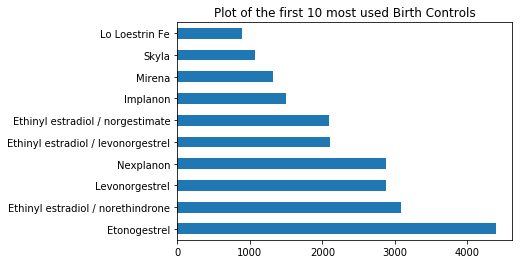

In [59]:
cond_bc.drugName.value_counts()[:10].plot(kind='barh') #plot of the first 10 most used birth control
#plt.xlabel('')
#plt.ylabel('')
plt.title("Plot of the first 10 most used Birth Controls")
plt.show()

The following is sorting the Birth Control condition by rating for the fist 20 birth controls (high to low rating)



In [60]:
df2[df2['condition']=='Birth Control'].sort_values(by = 'rating', ascending=False)[:20]  

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
28751,131155,Levonorgestrel,Birth Control,"""I love my Mirena. I&#039;ve recommended it to several friends. I&#039;m 43 and have 2 kids and wanted something to simplify my life. Insertion was not at all painful or even uncomfortable. I had ...",10.0,"October 1, 2008",505
106472,215953,Copper,Birth Control,"""I had my Paragard inserted about 3 weeks ago without pre-medicating (I was suggested to take 600-800 mg of ibuprofen beforehand, but I forgot, DO NOT MAKE THIS MISTAKE). I think I have a high pai...",10.0,"April 25, 2016",9
86026,6450,Ocella,Birth Control,"""I LOVE OCELLA! I was on a generic form of Seasonale and it was HORRIBLE had the worst depression/mood swings ever and breakthrough bleeding EVERYDAY. So I switched to Ocella and love it. Acne has...",10.0,"December 11, 2009",6
33652,227728,Etonogestrel,Birth Control,"""I was on the pill (Yaz) for 3 years and it wasn&#039;t too bad but I am terrible at remembering to take it so I decided to switch to something more permanent for a while and I&#039;m glad I went ...",10.0,"January 19, 2012",1
106498,107279,Implanon,Birth Control,"""I have an issue with needles, so working up the nerve to get this took me a while. Aside from the initial burn of the numbing medicine I felt nothing. It was actually really cool to watch. The im...",10.0,"January 7, 2012",1
106479,188562,ParaGard,Birth Control,"""I recommend Paraguard 200%! I am sharing my experience everywhere I can, because after my second child, when researching getting paraguard online, all I saw were negative reviews (because typica...",10.0,"November 17, 2016",25
86030,9166,Lo Loestrin Fe,Birth Control,"""I have been on this birth control for 4 months and it has been great. I had breakthrough bleeding the first couple months but now I don&#039;t have any bleeding or period. I have lost 10 pounds b...",10.0,"July 15, 2017",8
33631,167614,Levonorgestrel,Birth Control,"""I&#039;m a 20yr old woman who has never had kids and I&#039;m here to tell you how to get an IUD so you don&#039;t have a terrible experience like some of the people who rate this drug badly\nDon...",10.0,"February 2, 2016",35
33624,129910,Levonorgestrel,Birth Control,"""Mirena is an awesome option for birth control. I don&#039;t even have to think about taking a pill or remembering to replace a patch. It was easy to get inserted and it is barely noticeable that ...",10.0,"April 7, 2015",3
132338,138079,Ortho Evra,Birth Control,"""I&#039;ve been on the patch for 3 weeks now, I am now on my patch free week, and I think it&#039;s great. There&#039;s no itching or Reddening at the placement site and I alternate between placem...",10.0,"May 29, 2013",18


In [61]:
df2[df2['condition']=='Birth Control'].sort_values(by = 'rating', ascending=False)[:40].describe()

,Unnamed: 0,rating,usefulCount
count,40.000000,40.0,40.000000
mean,125554.075000,10.0,22.300000
std,67362.838713,0.0,78.768144
min,6450.000000,10.0,0.000000
25%,96695.750000,10.0,2.750000
50%,129991.000000,10.0,7.500000
75%,172851.000000,10.0,18.000000
max,228123.000000,10.0,505.000000


In [62]:
#check the column-wise distribution of null values: 
print(df2.isnull().sum())                   

Unnamed: 0        0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64


In [63]:
print(df2.isnull().values.sum()) #total number of missing values in the DataFrame

1194


The following is the list of Drug names ordered alphabetically and the associated ratings of them.



In [64]:
df2.groupby('drugName')['rating'].describe()
#df2.groupby('drugName').describe()

,count,mean,std,min,25%,50%,75%,max
drugName,,,,,,,,
A + D Cracked Skin Relief,1.0,10.000000,NaN,10.0,10.00,10.0,10.00,10.0
A / B Otic,2.0,10.000000,0.000000,10.0,10.00,10.0,10.00,10.0
Abacavir / dolutegravir / lamivudine,70.0,8.414286,2.422676,1.0,7.25,10.0,10.00,10.0
Abacavir / lamivudine,3.0,10.000000,0.000000,10.0,10.00,10.0,10.00,10.0
Abacavir / lamivudine / zidovudine,1.0,9.000000,NaN,9.0,9.00,9.0,9.00,9.0
Abatacept,25.0,7.000000,3.316625,1.0,5.00,9.0,10.00,10.0
Abilify,593.0,6.443508,3.430378,1.0,3.00,8.0,10.00,10.0
Abilify Discmelt,3.0,8.333333,0.577350,8.0,8.00,8.0,8.50,9.0
Abilify Maintena,5.0,8.200000,4.024922,1.0,10.00,10.0,10.00,10.0


In [65]:
df2.groupby('drugName')['rating']  #remove describe the bottom cell

In [67]:
df2.groupby('drugName')['rating'].agg({'count':sum}).head()
#what does this do? this count is the numebr or rows

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,count
drugName,
A + D Cracked Skin Relief,10.0
A / B Otic,20.0
Abacavir / dolutegravir / lamivudine,589.0
Abacavir / lamivudine,30.0
Abacavir / lamivudine / zidovudine,9.0


In [68]:
df2.groupby('drugName')['rating'].count()


drugName
A + D Cracked Skin Relief                              1
A / B Otic                                             2
Abacavir / dolutegravir / lamivudine                  70
Abacavir / lamivudine                                  3
Abacavir / lamivudine / zidovudine                     1
Abatacept                                             25
Abilify                                              593
Abilify Discmelt                                       3
Abilify Maintena                                       5
Abiraterone                                           12
AbobotulinumtoxinA                                     4
Abraxane                                               4
Abreva                                               205
Absorbine Jr.                                          1
Absorica                                               4
Abstral                                                1
Acamprosate                                          143
Acanya                

In [69]:
df2.groupby('drugName' , sort = False)['rating'].describe() 
# difference btw sort = False or otherwise? when sort = False is not there, it will sort alphabetically.

,count,mean,std,min,25%,50%,75%,max
drugName,,,,,,,,
Mirtazapine,727.0,7.180193,2.976352,1.0,5.5,8.0,10.0,10.0
Mesalamine,237.0,7.540084,2.924813,1.0,7.0,9.0,10.0,10.0
Bactrim,273.0,6.043956,3.619531,1.0,2.0,7.0,10.0,10.0
Contrave,1215.0,6.781070,3.227222,1.0,4.0,8.0,10.0,10.0
Cyclafem 1 / 35,11.0,6.090909,2.879394,1.0,4.0,6.0,8.5,10.0
Zyclara,34.0,7.441176,2.162927,1.0,7.0,8.0,9.0,10.0
Copper,801.0,7.111111,3.282360,1.0,5.0,9.0,10.0,10.0
Amitriptyline,921.0,7.817590,2.813275,1.0,7.0,9.0,10.0,10.0
Methadone,442.0,8.828054,1.976582,1.0,8.0,10.0,10.0,10.0


In [70]:
grouped = df2.groupby('drugName' , sort = False)['rating'].describe()
grouped.sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
drugName,,,,,,,,
Levonorgestrel,4930.0,7.384584,3.130904,1.0,5.0,9.0,10.0,10.0
Etonogestrel,4421.0,5.824022,3.321706,1.0,3.0,6.0,9.0,10.0
Ethinyl estradiol / norethindrone,3753.0,5.589129,3.397699,1.0,2.0,6.0,9.0,10.0
Nexplanon,2892.0,5.643154,3.325100,1.0,2.0,6.0,9.0,10.0
Ethinyl estradiol / norgestimate,2790.0,5.802151,3.292635,1.0,2.0,6.0,9.0,10.0
Ethinyl estradiol / levonorgestrel,2503.0,5.763084,3.293315,1.0,3.0,6.0,9.0,10.0
Phentermine,2085.0,8.776978,1.971157,1.0,8.0,10.0,10.0,10.0
Sertraline,1868.0,7.452891,2.909163,1.0,6.0,9.0,10.0,10.0
Escitalopram,1747.0,7.829422,2.691164,1.0,7.0,9.0,10.0,10.0


In [71]:
grouped.sort_values('count', ascending=False)[:10]

,count,mean,std,min,25%,50%,75%,max
drugName,,,,,,,,
Levonorgestrel,4930.0,7.384584,3.130904,1.0,5.0,9.0,10.0,10.0
Etonogestrel,4421.0,5.824022,3.321706,1.0,3.0,6.0,9.0,10.0
Ethinyl estradiol / norethindrone,3753.0,5.589129,3.397699,1.0,2.0,6.0,9.0,10.0
Nexplanon,2892.0,5.643154,3.325100,1.0,2.0,6.0,9.0,10.0
Ethinyl estradiol / norgestimate,2790.0,5.802151,3.292635,1.0,2.0,6.0,9.0,10.0
Ethinyl estradiol / levonorgestrel,2503.0,5.763084,3.293315,1.0,3.0,6.0,9.0,10.0
Phentermine,2085.0,8.776978,1.971157,1.0,8.0,10.0,10.0,10.0
Sertraline,1868.0,7.452891,2.909163,1.0,6.0,9.0,10.0,10.0
Escitalopram,1747.0,7.829422,2.691164,1.0,7.0,9.0,10.0,10.0


In [72]:
top_drugcount = grouped.sort_values('count', ascending=False)[:10]
print(top_drugcount)
print(type(top_drugcount))
print(top_drugcount.index)

                                     count      mean       std  min  25%  \
drugName                                                                   
Levonorgestrel                      4930.0  7.384584  3.130904  1.0  5.0   
Etonogestrel                        4421.0  5.824022  3.321706  1.0  3.0   
Ethinyl estradiol / norethindrone   3753.0  5.589129  3.397699  1.0  2.0   
Nexplanon                           2892.0  5.643154  3.325100  1.0  2.0   
Ethinyl estradiol / norgestimate    2790.0  5.802151  3.292635  1.0  2.0   
Ethinyl estradiol / levonorgestrel  2503.0  5.763084  3.293315  1.0  3.0   
Phentermine                         2085.0  8.776978  1.971157  1.0  8.0   
Sertraline                          1868.0  7.452891  2.909163  1.0  6.0   
Escitalopram                        1747.0  7.829422  2.691164  1.0  7.0   
Mirena                              1673.0  6.617454  3.316370  1.0  3.0   

                                     50%   75%   max  
drugName                        

In [73]:
print(top_drugcount.columns)

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')


#### The followings are the box plots of rating of different Birth Contol drugs grouped by drug name.¶


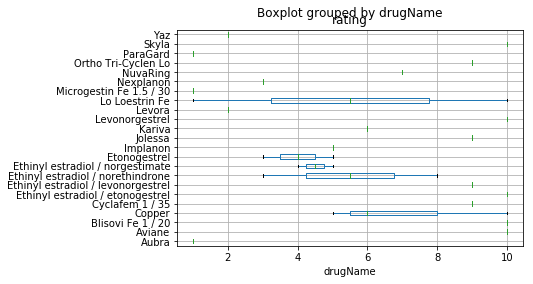

In [74]:
df2[df2['condition']=='Birth Control'][:30].boxplot(column='rating', by='drugName' , rot = 0, vert=0)

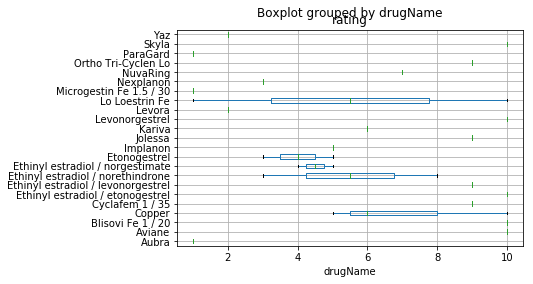

In [75]:
cond_bc[:30].boxplot(column='rating', by='drugName' , rot = 0, vert=0)

#### This is the table of different conditions listed for the statistic, i.e. the mean and standard deviation, etc., of their ratings listed by the highest to lowest count in the data set.¶


In [76]:
grouped_cond = df2.groupby('condition' , sort = False)['rating'].describe()
grouped_cond.sort_values('count', ascending=False).head(15)

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
Birth Control,38436.0,6.077974,3.309582,1.0,3.0,7.0,9.0,10.0
Depression,12164.0,7.100625,3.104405,1.0,5.0,8.0,10.0,10.0
Pain,8245.0,7.619648,2.940193,1.0,7.0,9.0,10.0,10.0
Anxiety,7812.0,7.688556,2.979795,1.0,7.0,9.0,10.0,10.0
Acne,7435.0,7.372831,3.043283,1.0,6.0,9.0,10.0,10.0
Bipolar Disorde,5604.0,7.120271,3.155072,1.0,5.0,8.0,10.0,10.0
Insomnia,4904.0,6.692496,3.448768,1.0,3.0,8.0,10.0,10.0
Weight Loss,4857.0,8.031295,2.790061,1.0,7.0,9.0,10.0,10.0
Obesity,4757.0,7.730923,2.907083,1.0,7.0,9.0,10.0,10.0



Now that we have a good understanding of the data set, we can move on to statistical inference as well as machine learning techniques on the review of the drugs for various conditions.

## Statistical Inference
After the data visualization phase of the project, due to the fact that the data given by the data source was split into test and train by default, we perform statistical inferences to see how the mean and standard deviation of the ratios of the top 4 conditions (Birth Control, Depression, Pain and Anxiety) in the test and train sets differ and whether the test and train sets are stratified in any of the mentioned conditions. We achieve this by using Null vs Alternative hypothesis, meaning that we perform the hypothesis testing on proportion of Birth Control, Depression, Pain and Anxiety in the test and train sets as well as the entire merged data set. For hypothesis testing, we also do a comparison of the mean drug rating between the test and train sets (df1 and df). This item is particularly important because if the conditions are exactly balanced, the people that made the datasets might have stratified over condition. Stratifying guarantees that those classes will be balanced, but makes it more likely that other variables (e.g. review score) not used for stratification will be imbalanced.

+ For hypothesis testing:

Now, we are doing hypothesis tests on proportion of birth control, depression, pain and anxiety.
We do a comparison (and test) of the mean drug rating between the test and train sets (df1 and df). This item is particularly important because if the conditions are exactly balanced, the people that made the datasets might have stratified over condition. Stratifying guarantees that those classes will be balanced, but makes it more likely that other variables (e.g. review score) not used for stratification will be imbalanced

In [77]:
df2t = len(df2.condition)
df2t

215063

In [79]:
df2.rating[:10]

0    10.0
1     8.0
2     9.0
3     9.0
4     9.0
5     4.0
6     6.0
7     9.0
8     7.0
9     2.0
Name: rating, dtype: float64

In [80]:
cbc = len(df2[df2['condition'] == 'Birth Control'] )
#df2[df2['condition']=='Birth Control']

In [81]:
cd = len(df2[df2['condition'] == 'Depression'] )

In [82]:
cp = len(df2[df2['condition'] == 'Pain'] )

In [83]:
ca = len(df2[df2['condition'] == 'Anxiety'] )

In [84]:
print('ratio of Birth Control in the entire data set is: ' + str(cbc/df2t))
print('ratio of Depression in the entire data set is: ' + str(cd/df2t))
print('ratio of Pain in the entire data set is: ' + str(cp/df2t))
print('ratio of Anxiety in the entire data set is: ' + str(ca/df2t))

ratio of Birth Control in the entire data set is: 0.1787197239878547
ratio of Depression in the entire data set is: 0.05656017074066669
ratio of Pain in the entire data set is: 0.03833760339993397
ratio of Anxiety in the entire data set is: 0.036324239873897414


In [85]:
df1t = len(df1.condition)   #df1 is the train
cbc1 = len(df1[df1['condition'] == 'Birth Control'] )
cd1 = len(df1[df1['condition'] == 'Depression'] )
cp1 = len(df1[df1['condition'] == 'Pain'] )
ca1 = len(df1[df1['condition'] == 'Anxiety'] )

print('ratio of Birth Control in the train data set is: ' + str(cbc1/df1t))
print('ratio of Depression in the train data set is: ' + str(cd1/df1t))
print('ratio of Pain in the train data set is: ' + str(cp1/df1t))
print('ratio of Anxiety in the train data set is: ' + str(ca1/df1t))

ratio of Birth Control in the train data set is: 0.1784782110020645
ratio of Depression in the train data set is: 0.05622547226544821
ratio of Pain in the train data set is: 0.03809742276669746
ratio of Anxiety in the train data set is: 0.03660328462401657


In [86]:
dft = len(df.condition)   #df is the test 
cbc0 = len(df[df['condition'] == 'Birth Control'] )
cd0 = len(df[df['condition'] == 'Depression'] )
cp0 = len(df[df['condition'] == 'Pain'])
ca0 = len(df[df['condition'] == 'Anxiety'])

print('ratio of Birth Control in the test data set is: ' + str(cbc0/dft))
print('ratio of Depression in the test data set is: ' + str(cd0/dft))
print('ratio of Pain in the test data set is: ' + str(cp0/dft))
print('ratio of Anxiety in the test data set is: ' + str(ca0/dft))

ratio of Birth Control in the test data set is: 0.17944425845329762
ratio of Depression in the test data set is: 0.0575642599412268
ratio of Pain in the test data set is: 0.039058140832496376
ratio of Anxiety in the test data set is: 0.03548711081352528


In [87]:
delta_bc =  cbc0/dft - cbc1/df1t
print('difference of the rations between Birth Control on the test and train data set  is: ' + str(delta_bc))
delta_d =  cd0/dft - cd1/df1t
print('difference of the rations between Depression on the test and train data set  is: ' + str(delta_d))
delta_p =  cp0/dft - cp1/df1t
print('difference of the rations between Pain on the test and train data set  is: ' + str(delta_p))
delta_a =  ca0/dft - ca1/df1t
print('difference of the rations between Anxiety on the test and train data set  is: ' + str(delta_a))

difference of the rations between Birth Control on the test and train data set  is: 0.0009660474512331041
difference of the rations between Depression on the test and train data set  is: 0.0013387876757785869
difference of the rations between Pain on the test and train data set  is: 0.0009607180657989142
difference of the rations between Anxiety on the test and train data set  is: -0.0011161738104912902


#### Hypothesis test: #df1 is the train set and df is the test set
+ H_0 : mean drug rating for the total and the test data set is the same
+ H_a : mean drug rating for the total and the test data set is not the same

In [88]:
np.mean(df2.rating)
print('Mean of drug rating on the entire data set is: ' + str(np.mean(df2.rating)))

np.mean(df1.rating)
print('Mean of drug rating on the train data set is: ' + str(np.mean(df1.rating)))

np.mean(df.rating)
print('Mean of drug rating on the test data set is: ' + str(np.mean(df.rating)))

Mean of drug rating on the entire data set is: 6.990007579174474
Mean of drug rating on the train data set is: 6.994376832799122
Mean of drug rating on the test data set is: 6.97689989956478


In [89]:
np.std(df2.rating)
print('Standard deviation of drug rating on the entire data set is: ' + str(np.std(df2.rating)))

np.std(df1.rating)
print('Standard deviation of drug rating on the train data set is: ' + str(np.std(df1.rating)))

np.std(df.rating)
print('Standard deviation of drug rating on the test data set is: ' + str(np.std(df.rating)))

Standard deviation of drug rating on the entire data set is: 3.2755468822457248
Standard deviation of drug rating on the train data set is: 3.2723190652035488
Standard deviation of drug rating on the test data set is: 3.285176379204773


In [90]:
def permutation_sample(d1, d2):  
    d = np.concatenate((d1, d2))
    perm_d = np.random.permutation(d)
    return perm_d[:len(d1)], perm_d[len(d1):]

In [91]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [92]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(df1.rating, df.rating)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(df1.rating, df.rating, diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.1416


In [93]:
conf_int_bs_repl = np.percentile(perm_replicates, [0.5, 99.5]) 
print(conf_int_bs_repl)

[-0.04283439  0.04202793]


In [94]:
if p < 0.01: 
    print('We reject H_0')
else:
        print('Fail to reject H_0')

Fail to reject H_0


After implementing the statistical inference tests by utilizing Null and Alternative hypotheses, we come to the conclusion that we can’t reject the Null hypothesis, meaning that the ratios of the top 4 conditions in the train and test sets as well as in the entire set is the same. Moreover, the mean of the rating of the reviews in the 3 sets of test, train and the entire data set are the same.



Now, we are going to perform Machine Learning on the prediction of rating for the reviews of different conditions. 

### Machine Learning -- NLP
For the final phase of this project, NLP Machine Learning is performed. Due to the fact that the dataset provides patient reviews on specific drugs associated with related conditions and a 10-star patient rating reflecting overall patient satisfaction of the drug chosen for that specific condition, we choose Natural Language Processing Machine Learning techniques in predicting the rating for the reviews of the drugs for the first four most reviewed conditions of Birth Control, Depression, Pain and Anxiety. In the following cells, we import the needed libraries and then get our data set ready for the machine learning techniques we will choose.

In [95]:
df2.drugName.value_counts()[:10]

Levonorgestrel                        4930
Etonogestrel                          4421
Ethinyl estradiol / norethindrone     3753
Nexplanon                             2892
Ethinyl estradiol / norgestimate      2790
Ethinyl estradiol / levonorgestrel    2503
Phentermine                           2085
Sertraline                            1868
Escitalopram                          1747
Mirena                                1673
Name: drugName, dtype: int64

In [96]:
df2.condition.value_counts()[:10]

Birth Control      38436
Depression         12164
Pain                8245
Anxiety             7812
Acne                7435
Bipolar Disorde     5604
Insomnia            4904
Weight Loss         4857
Obesity             4757
ADHD                4509
Name: condition, dtype: int64

In [97]:
print(df2[df2['condition'] == 'Birth Control'].review.head())

4     "I have been on this birth control for one cycle. After reading some of the reviews on this type and similar birth controls I was a bit apprehensive to start. Im giving this birth control a 9 out ...
6     "I&#039;ve had the copper coil for about 3 months now. I was really excited at the thought of not taking hormones. I&#039;m good with pain however I nearly fainted with insertion, couldn&#039;t be...
9     "I was on this pill for almost two years. It does work as far as not getting pregnant however my experience at first was it didn&#039;t make a huge difference then 6 or 7 months into it my sex dri...
30    "I absolutely love this product and recommend to everyone. I know everyone&#039;s body is different, so it is not for everyone, but it is not the medicines fault. I have NO negative symptoms since...
37    "I was on this for 5 years (and birth control pills for about 12 years), and would have told you how fabulous it was.  &lt;List all the benefits everyone else has listed,

In [98]:
print(df2[df2['condition'] == 'Anxiety'].review.head())

48                                                                                                                                                                                              "Works for me"
63     "I was prescribed this for onset of anxiety and possible hormonal mood swings. I was not told by my doctor how it would make me feel or how hard coming off of it would be. I took one 37.5 mg capsu...
83     "I did not like this medication. For anxiety, I have also tried Hydroxyzine (Atarax). I guess this is just my personal body chemistry but I actually prefer Atarax to this unlike most people. This ...
133    "I&#039;m a 32 year old male and I&#039;ve been taking buspar for about 10 months. At first it did nothing but make my anxiety worse. I would wake up with to full blown panic attacks and have the ...
208    "Klonopin is a very effective medicine for people such as myself that suffer from debilitating panic disorder and/or PTSD.  This medicine saved me from becoming inst

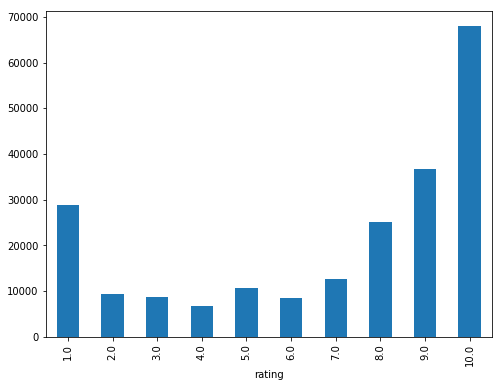

In [99]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df2.groupby('rating').review.count().plot.bar(ylim=0)
plt.show()

In [100]:
df2.review.count()

215063

In [101]:
df2[df2['condition'] == 'Birth Control'].review.count()

38436

In [102]:
print("The ration of the birth control review to the reviews of the entire data set: " + str(df2[df2['condition'] == 'Birth Control'].review.count()/df2.review.count()))

The ration of the birth control review to the reviews of the entire data set: 0.1787197239878547


#### Review feature of the Data Set -- NLP
On the Machine Learning phase, we start looking at the text documents of the review column. In order to do that, we need to do some text pre-processing. We process and tokenize corpus of reviews to build features for predictive models. Also, train machine learning models to predict drug rating based on reviews and relevant metadata.
In order to do that, we need to pre-process our text data by removing tags, i.e. HTML tags, as well as removing accented characters, é to e., special characters, which mainly add to the extra noise than giving benefits. We also need to stem the words as well as lemmatize in cases (stemming is cutting the word and keeping the root of the word and lemmatization is that the remaining root is grammatically a correct form but stem of the word is not). Another step in text pre-processing is to remove the Stop words. Stop words are the words with little and insignificance meaning in the corpus. Words such as a, an, the are examples of Stop words in English. Last but not least, we remove extra whitespaces, text lower casing as well as spelling corrections, grammatical error corrections, removing repeated characters to name a few. We then tokenize the corpus to build features for predictive models.

#### Text pre-processing
Removing tags: Removing unnecessary HTML tags, etc. which do not add much value when analyzing text (The BeautifulSoup library does an excellent job in providing necessary functions for this.).

Removing accented characters: Removing accented characters\letters in the text corpus and convert these characters and standardized into ASCII characters, an example is to convert é to e.

Expanding contractions: Converting contraction to its expanded, original form often helps with text standardization, example of which would be, "do not" to "don’t" and "I would" to "I’d".

Removing special characters: Removing special characters and symbols often add to the extra noise in unstructured text. More than often, simple regular expressions (regexes) can be used to achieve this.

Stemming and lemmatization: The reverse process of inflection is called stemming, which is basically obtaining the base form of a word. Lemmatization is very similar to stemming, the difference being that the root word from lemmatization is always a lexicographically correct word but the root stem may not be so.

Removing stopwords: Words with little or no significance in text corpus are known as stopwords, example of which are: a, an, the. We can use a standard English language stopwords list from nltk and also add our own domain specific stopwords as needed.

Other text cleaning to do would be tokenization, removing extra whitespaces, text lower casing as well as spelling corrections, grammatical error corrections, removing repeated characters to name a few.

In [104]:
from bs4 import BeautifulSoup
import unicodedata
import nltk 
nltk.download('stopwords')
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
#from matplotlib import pyplot
import pylab
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm 
from scipy import stats 
from statsmodels.stats.weightstats import ztest

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nazanin.komeilizadeh/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [105]:
# Let's remove special characters, extra whitespaces, digits, stopwords and lower casing the text corpus
#result = re.sub(pattern, repl, string, count=0, flags=0);
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english", ignore_stopwords=True)   ###plscheck this 
wpt = nltk.WordPunctTokenizer()  # $4.99 
stop_words = nltk.corpus.stopwords.words('english')
stop_words.append('</span> users found this comment helpful.') 
stop_words.append('&#039')
def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A) 
    #re.I A means treats . as whatever it is. Performs case-insensitive matching. #issues with FLAGS!!!!!
    doc = doc.lower()
    doc = doc.strip()
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words] 
    filtered_tokens = [stemmer.stem(word) for word in filtered_tokens]  
    doc = ' '.join(filtered_tokens)
    return doc
normalize_corpus = np.vectorize(normalize_document)
# doc is the list of strings

We first attempt to analyze the rating of the reviews of the birth control drugs since birth control was the highest count for the condition in the data set with almost one fifth of the entire data set. Moreover, the number of reviews for birth control was the highest compared to the other conditions with the same ratio of 18%.

In [107]:
import re

In [108]:
norm_corpus = normalize_corpus(df2[df2['condition'] == 'Birth Control'].review)

In [109]:
norm_corpus

array(['birth control one cycl read review type similar birth control bit apprehens start im give birth control long enough far love birth control side effect minim like im even birth control experienc mild headach nausea ive feel great got period cue third day inact pill idea come zero pms period light bare cramp unprotect sex first month obvious didnt get pregnant im pleas high recommend',
       'ive copper coil month realli excit thought take hormon im good pain howev near faint insert couldnt beliv pain doctor say pain well month period last day im pain day random twang especi left side im consid whether want put intens pain heavi period id recommend somebodi doesnt alreadi heavi pain period right isnt',
       'pill almost two year work far get pregnant howev experi first didnt make huge differ month sex drive went along dri moodi increas drastic would cri one second get angri husband anyth everyth skin gotten lot wors broke place never last week yaz',
       ...,
       'experi 

In [110]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In order to get more familiar with our birth control reviews, let us see what words are mostly used in that corpus. For this reason, we define a function to count the top "n" words in the corpus for us.

In [111]:
def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    
    get_top_n_words(["I love Python", "Python is a language programming", "Hello world", "I love the world"]) -> 
    [('python', 2),
     ('world', 2),
     ('love', 2),
     ('hello', 1),
     ('is', 1),
     ('programming', 1),
     ('the', 1),
     ('language', 1)]
    """
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [112]:
get_top_n_words(normalize_corpus(df2[df2['condition'] == 'Birth Control'].review), n=40)  #None


[('period', 37273),
 ('month', 36515),
 ('pill', 26390),
 ('get', 23071),
 ('ive', 21923),
 ('day', 21659),
 ('im', 20430),
 ('year', 19498),
 ('control', 18934),
 ('week', 18639),
 ('birth', 18338),
 ('take', 18146),
 ('first', 17184),
 ('cramp', 16278),
 ('gain', 15381),
 ('weight', 15367),
 ('start', 15324),
 ('effect', 14001),
 ('got', 13875),
 ('time', 13647),
 ('pain', 13167),
 ('like', 13144),
 ('side', 12075),
 ('bleed', 11932),
 ('would', 11297),
 ('insert', 11113),
 ('feel', 10858),
 ('sinc', 10519),
 ('mood', 10392),
 ('acn', 10089),
 ('never', 9849),
 ('spot', 9770),
 ('sex', 9433),
 ('bad', 9376),
 ('go', 9145),
 ('use', 9100),
 ('also', 9021),
 ('one', 8951),
 ('last', 8476),
 ('dont', 8321)]

As we can see, words such as period, month, pill, etc. are among the highest count in the birth control corpus.



In [113]:
common_words_BC = get_top_n_words(normalize_corpus(df2[df2['condition'] == 'Birth Control'].review), 20)
for word, freq in common_words_BC:
    print(word, freq)

period 37273
month 36515
pill 26390
get 23071
ive 21923
day 21659
im 20430
year 19498
control 18934
week 18639
birth 18338
take 18146
first 17184
cramp 16278
gain 15381
weight 15367
start 15324
effect 14001
got 13875
time 13647


Utilizing CountVectorizer, we group the words in the corpus one by one or 2 by 2. This is called "n-gram". We start by 2-gram and we implement machine learning techniques to check the performance of the 2-gram and then compare it with 1-gram.

In [114]:
vectorizer = CountVectorizer(ngram_range=(2,2), min_df=0.05, max_df=1.0, max_features=500)

# call `fit` to build the vocabulary
vectorizer.fit(norm_corpus)

# call `transform` to convert text to a bag of words
x = vectorizer.transform(norm_corpus)

# CountVectorizer uses a sparse array to save memory, but it's easier in this assignment to 
# convert back to a "normal" numpy array
x = x.toarray()  # this is for visualization purposes 

print()
print("Transformed text vector is \n", x)

# `get_feature_names` tracks which word is associated with each column of the transformed x
print
print("Words for each feature:")
print(vectorizer.get_feature_names())  # visualization


Transformed text vector is 
 [[5 0 1 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 1]
 [2 0 0 ... 0 0 0]]
Words for each feature:
['birth control', 'feel like', 'first month', 'gain weight', 'mood swing', 'sex drive', 'side effect', 'take pill', 'weight gain']


In [115]:
x.shape

(38436, 9)

After getting the corpus ready for NLP Machine Learning techniques, we are now about to choose the proper techniques to be able to train the train set and be able to predict on the test set. Naive Bayes, Random Forest are among the most popular feature predicting models. The criteria on how to choose the proper machine learning technique is the performance and efficiency of the technique. In this project, we choose Naïve Bayes, Random Forest and Extreme Gradient Boosting techniques and we implement them on the rankings of the reviews of the four mostly reviewed and populated conditions in the data set, namely, Birth Control, Depression, Pain and Anxiety.

In [116]:
y = df2[df2['condition'] == 'Birth Control'].rating  # df2['rating']
xtrain, xtest, ytrain, ytest = train_test_split(x, y)  #(default=0.25)
clf = MultinomialNB().fit(xtrain, ytrain)

In [117]:
training_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)

In [118]:
print("MN Accuracy: %0.2f%%" % (100 * clf.score(xtest, ytest)))
print("Accuracy on training data: %0.2f" % (training_accuracy))
print("Accuracy on test data:     %0.2f" % (test_accuracy))   #30% is precicely predicting the ratings for df2_min = 0.1
# do a good and bad as a binary!

MN Accuracy: 21.62%
Accuracy on training data: 0.21
Accuracy on test data:     0.22


Naive Bayes prediction turned out at a disappointing rate of only 21%! Let's switch to other models and see how they perform.



In [120]:
#regressor target variables rating is 
# Train the model with Random Foprest Classifier     
clf_RF = RandomForestClassifier()  
#n_jobs=2 number of cores the computer uses, n_estimators = 500 (number of trees)  startt 50 
clf_RF.fit(xtrain, ytrain)  
# predict and evaluate performance
clf_RF_predictions = clf_RF.predict(xtest)
#meu.display_model_performance_metrics(true_labels=ytest, predicted_labels=clf_RF_predictions , classes= range(1,11))
#hash maps a value to another value and it's more efficient in computation
# normaization removing bias that could exists in a data set 
# correcting for the size of the corpus. one word review and the other is 200000 words 
# and contains the word good and we should 
# normaliztion in NLP is to use word frequecy.

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [121]:
print(clf_RF.feature_importances_)

[0.19425585 0.05325275 0.09694536 0.10222597 0.14209784 0.07632966
 0.13444263 0.10651804 0.09393191]


In [122]:
print(clf_RF.get_params())

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [123]:
#gridsearch and hyoerparameter tuning (on the TRAIN set) 
param_grid = {'n_estimators': [100, 200, 300, 500], 'max_features': ['auto', None, 'log2']}
clf_RF = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
clf_RF.fit(xtrain, ytrain)
print(clf_RF.best_params_)

{'max_features': 'auto', 'n_estimators': 500}


In [126]:
# The best hyperparameter performance occurs at: {'max_features': None, 'n_estimators': 100} 0.2269 0.0036

In [127]:
clf_RF = RandomForestClassifier(n_estimators=100, max_features=None, random_state=42)
clf_RF.fit(xtrain, ytrain)
clf_RF_predictions = clf_RF.predict(xtest)

In [128]:
print(confusion_matrix(ytest,clf_RF_predictions))  
print(classification_report(ytest,clf_RF_predictions))  
print(accuracy_score(ytest, clf_RF_predictions))

[[821   8  16  18  22   6   5  17  95 470]
 [348  18   7   4  16  12   3  17  46 225]
 [305  16  32   2  12   4   2  14  56 238]
 [241   8  11  15   9   6   5  17  45 168]
 [348   5  10   6  33   3   5  15  66 236]
 [196   5   6   4   3  23   3  15  50 174]
 [219   7   7  12   7   3  22   9  74 220]
 [393   9  11   7  15   1  18  83 117 436]
 [534  18  12   1  19   5  13  30 198 560]
 [732  12   7  12  15   7  14  28 153 983]]
              precision    recall  f1-score   support

         1.0       0.20      0.56      0.29      1478
         2.0       0.17      0.03      0.04       696
         3.0       0.27      0.05      0.08       681
         4.0       0.19      0.03      0.05       525
         5.0       0.22      0.05      0.08       727
         6.0       0.33      0.05      0.08       479
         7.0       0.24      0.04      0.07       580
         8.0       0.34      0.08      0.12      1090
         9.0       0.22      0.14      0.17      1390
        10.0       0.26     

As we see, even Random Forest couldn't do much better than NB method so the next thing to do is to switch the (2,2) gram to (1,2) gram and see the performance of our models accordingly.

In [129]:
from sklearn.datasets import make_classification
clf_RF.score(x, y, sample_weight=None)  # on the entire data here so obviously it goes up by a few percentages

0.2559059215318972

Now, we are performing ngram(1,2):

In [130]:
# So now, let's change the ngram to (1,2)
vectorizer = CountVectorizer(ngram_range=(1,2), min_df=0.05, max_df=1.0, max_features=500)

# call `fit` to build the vocabulary
vectorizer.fit(norm_corpus)

# call `transform` to convert text to a bag of words
x = vectorizer.transform(norm_corpus)

# CountVectorizer uses a sparse array to save memory, but it's easier in this assignment to 
# convert back to a "normal" numpy array
x = x.toarray()  # this is for visualization purposes 

print()
print("Transformed text vector is \n", x)

# `get_feature_names` tracks which word is associated with each column of the transformed x
print
print("Words for each feature:")
print(vectorizer.get_feature_names())  # visualization


Transformed text vector is 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]]
Words for each feature:
['absolut', 'acn', 'actual', 'ago', 'almost', 'also', 'alway', 'anoth', 'anxieti', 'anyth', 'around', 'away', 'back', 'bad', 'bc', 'best', 'better', 'birth', 'birth control', 'bit', 'bleed', 'bloat', 'bodi', 'break', 'breast', 'cant', 'caus', 'chang', 'clear', 'come', 'complet', 'constant', 'control', 'could', 'coupl', 'cramp', 'crazi', 'cri', 'day', 'decid', 'definit', 'depress', 'didnt', 'differ', 'doctor', 'dont', 'drive', 'due', 'eat', 'effect', 'emot', 'end', 'even', 'ever', 'everi', 'everyon', 'everyth', 'experi', 'experienc', 'extrem', 'face', 'far', 'feel', 'feel like', 'felt', 'fine', 'first', 'first month', 'gain', 'gain weight', 'get', 'give', 'go', 'good', 'got', 'gotten', 'great', 'half', 'happi', 'havent', 'headach', 'heavi', 'help', 'high', 'hope', 'hormon', 'horribl', 'hour', 'howev', 'hurt', 'im', 

In [131]:
x.shape

(38436, 199)

The default division percentage between train and test set is 25%, meaning that 25% of the data is held for test and 75% is being trained.

In [132]:
y = df2[df2['condition'] == 'Birth Control'].rating  # df2['rating']
xtrain, xtest, ytrain, ytest = train_test_split(x, y)  #(default=0.25)

In [133]:
#regressor target variables rating is 
# Train the model with Random Foprest Classifier     
clf_RF = RandomForestClassifier()  
#n_jobs=2 number of cores the computer uses, n_estimators = 500 (number of trees)  startt 50 
clf_RF.fit(xtrain, ytrain)  
# predict and evaluate performance
clf_RF_predictions = clf_RF.predict(xtest)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [134]:
print(clf_RF.feature_importances_)

[0.0025178  0.00763105 0.00295206 0.00416042 0.00569788 0.00733311
 0.0042652  0.00296243 0.00400324 0.00296286 0.00322742 0.00356844
 0.00617897 0.00678204 0.0033931  0.00422696 0.00390614 0.008557
 0.00808604 0.00287373 0.00918607 0.00320979 0.0039504  0.00317975
 0.00485337 0.00427004 0.00379788 0.00523812 0.00354142 0.00350346
 0.00292289 0.00451118 0.0083897  0.00323604 0.00292636 0.00920143
 0.00282706 0.00377668 0.01177802 0.00284377 0.00310868 0.00750183
 0.00593795 0.00427222 0.00518859 0.00677738 0.00498507 0.00278749
 0.00330592 0.0074131  0.00348435 0.0029295  0.00503289 0.00498853
 0.00598418 0.00241196 0.00283746 0.00552719 0.00441038 0.00444317
 0.00274399 0.00581174 0.00725485 0.00282848 0.00420634 0.00290583
 0.00954742 0.0035376  0.00827723 0.00321547 0.01217387 0.00323243
 0.00678679 0.00527805 0.00928264 0.00307252 0.0056934  0.00339777
 0.00307632 0.00491818 0.0049743  0.00477614 0.00415199 0.00304516
 0.0039123  0.00334722 0.00488072 0.00265783 0.00488315 0.002689

In [135]:
print(confusion_matrix(ytest,clf_RF_predictions))  
print(classification_report(ytest,clf_RF_predictions))  
print(accuracy_score(ytest, clf_RF_predictions))

[[1269   32   18   22   12    5    0   11   27   41]
 [  69  538   11    6   14    4    4   12   11   19]
 [ 116   29  482    6   11    7    2    8   17   14]
 [  40   15   14  367    4    4    4   10    9   15]
 [  71   18   13   13  522    8    2   16   24   31]
 [  28    5    2    0    9  363    8   14   20   13]
 [  40    4    9   12   16    2  501   24   31   44]
 [  40   16   11   11   11    9   12  805   44   70]
 [  62   14   13    6   13    8    8   50 1170  146]
 [  66   16   18    5   13    6    5   45  106 1648]]
              precision    recall  f1-score   support

         1.0       0.70      0.88      0.78      1437
         2.0       0.78      0.78      0.78       688
         3.0       0.82      0.70      0.75       692
         4.0       0.82      0.76      0.79       482
         5.0       0.84      0.73      0.78       718
         6.0       0.87      0.79      0.83       462
         7.0       0.92      0.73      0.82       683
         8.0       0.81      0.78   

In [136]:
print(clf_RF.get_params())

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [137]:
a = pd.DataFrame(data={'imp':clf_RF.feature_importances_,'vars':vectorizer.get_feature_names()})
a

,imp,vars
0,0.002518,absolut
1,0.007631,acn
2,0.002952,actual
3,0.004160,ago
4,0.005698,almost
5,0.007333,also
6,0.004265,alway
7,0.002962,anoth
8,0.004003,anxieti
9,0.002963,anyth


In [138]:
a.sort_values(by = 'imp' , ascending = False)

,imp,vars
130,0.014950,period
113,0.014534,month
108,0.013953,love
70,0.012174,get
131,0.012169,pill
38,0.011778,day
97,0.011748,ive
90,0.011508,im
187,0.011487,week
168,0.010243,take


The 80% is the prediction by Random Forest by its default hyper-parameters. We now fine tune the model with best parameters so we can see the change, hopefully an increase, in the prediction.

In [139]:
#gridsearch and hyperparameter tuning (on the TRAIN set) #THIS CELL IS 24K GOLD! 
param_grid = {'n_estimators': [100, 200, 300, 500], 'max_features': ['auto', None, 'log2']}
clf_RF = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
clf_RF.fit(xtrain, ytrain)
print(clf_RF.best_params_)

{'max_features': 'log2', 'n_estimators': 300}


In [141]:
clf_RF = RandomForestClassifier(n_estimators=300, max_features='log2', random_state=42)
clf_RF.fit(xtrain, ytrain)
clf_RF_predictions = clf_RF.predict(xtest)

In [142]:
print(confusion_matrix(ytest,clf_RF_predictions))  
print(classification_report(ytest,clf_RF_predictions))  
print(accuracy_score(ytest, clf_RF_predictions))

[[1364    4    0    0    0    0    0    4    8   57]
 [ 113  537    0    0    0    0    0    6    8   24]
 [ 139    4  476    0    6    0    0    6   16   45]
 [  59    0    2  372    2    0    0    6   20   21]
 [  91    0    2    0  520    0    0   11   31   63]
 [  29    0    2    0    0  360    0    9   15   47]
 [  44    0    0    0    5    0  495   12   40   87]
 [  43    0    2    0    2    0    0  781   62  139]
 [  27    2    0    0    0    0    0   22 1171  268]
 [  54    0    0    0    0    0    0    7   49 1818]]
              precision    recall  f1-score   support

         1.0       0.69      0.95      0.80      1437
         2.0       0.98      0.78      0.87       688
         3.0       0.98      0.69      0.81       692
         4.0       1.00      0.77      0.87       482
         5.0       0.97      0.72      0.83       718
         6.0       1.00      0.78      0.88       462
         7.0       1.00      0.72      0.84       683
         8.0       0.90      0.76   

Surpisingly and gladly the performance of Random Forest on the (1,2) gram was tremendously improved. Here, we see an 82% accuracy on the prediction on the actual rating of between 1 to 10 of a review, which is very impressive.

In [143]:
from sklearn.datasets import make_classification
clf_RF.score(xtest, ytest, sample_weight=None)

0.821521490269539

### Checking outside the corpus review rating
In order to verify our machine learning performance, we choose a review from outside the entire data set so see the prediction of the review by our algorithm. The review we chose is: "i loved this birth control. i used to have so much bloating with my previous pills and this one is honestly the best. my sex drive is better and I don't have side effects of wieght gain." This review of the birth control review is a 10-star. Let's see what our machine predicts through Random Forest.

In [144]:
normalize_corpus_outside = normalize_corpus(["i loved this birth control. i used to have so much bloating with my previous pills and this one is honestly the best. my sex drive is better and I don't have side effects of wieght gain."] ) 
# pre process, I do the count vectorizer, model.predict (on the verized form)

In [145]:
x = vectorizer.transform(normalize_corpus_outside)

In [146]:
clf_RF.predict(x)
print("The prediction on the rating for this review is: " + str(clf_RF.predict(x)))

The prediction on the rating for this review is: [10.]


In the following cells, we have normalized the corpus for other conditions, such as depression, pain and anxiety. We have followed all the steps that we did for the Birth Control and used Random Forest as our feature predicting model.

#### Depression

In [147]:
norm_corpus_D = normalize_corpus(df2[df2['condition'] == 'Depression'].review)


In [148]:
get_top_n_words(normalize_corpus(df2[df2['condition'] == 'Depression'].review), n=40)  #None


[('depress', 9308),
 ('take', 8613),
 ('feel', 8433),
 ('mg', 7995),
 ('day', 6832),
 ('effect', 6674),
 ('year', 5806),
 ('week', 5664),
 ('side', 5424),
 ('work', 5353),
 ('start', 5261),
 ('month', 4714),
 ('anxieti', 4674),
 ('im', 4345),
 ('like', 4249),
 ('help', 4242),
 ('medic', 3905),
 ('life', 3884),
 ('time', 3825),
 ('tri', 3736),
 ('ive', 3729),
 ('get', 3585),
 ('first', 3486),
 ('felt', 3143),
 ('better', 3143),
 ('sleep', 2807),
 ('go', 2745),
 ('doctor', 2734),
 ('medicin', 2708),
 ('back', 2593),
 ('much', 2483),
 ('would', 2421),
 ('also', 2418),
 ('one', 2203),
 ('realli', 2192),
 ('drug', 2190),
 ('good', 2128),
 ('dose', 2090),
 ('still', 2037),
 ('weight', 1999)]

In [149]:
# So now, let's change the ngram to (1,2)
vectorizer = CountVectorizer(ngram_range=(1,2), min_df=0.05, max_df=1.0, max_features=500)

# call `fit` to build the vocabulary
vectorizer.fit(norm_corpus_D)

# call `transform` to convert text to a bag of words
x = vectorizer.transform(norm_corpus_D)

# CountVectorizer uses a sparse array to save memory, but it's easier in this assignment to 
# convert back to a "normal" numpy array
x = x.toarray()  # this is for visualization purposes 

print()
print("Transformed text vector is \n", x)

# `get_feature_names` tracks which word is associated with each column of the transformed x
print
print("Words for each feature:")
print(vectorizer.get_feature_names())  # visualization


Transformed text vector is 
 [[0 1 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]
Words for each feature:
['abl', 'actual', 'ago', 'almost', 'also', 'alway', 'antidepress', 'anxieti', 'anyth', 'appetit', 'attack', 'away', 'back', 'bad', 'bed', 'best', 'better', 'cant', 'caus', 'celexa', 'chang', 'come', 'complet', 'could', 'couldnt', 'coupl', 'cri', 'cymbalta', 'day', 'depress', 'depress anxieti', 'didnt', 'differ', 'disord', 'doctor', 'dont', 'dose', 'drive', 'drug', 'due', 'eat', 'effect', 'effexor', 'energi', 'even', 'ever', 'everi', 'everyth', 'experi', 'experienc', 'extrem', 'far', 'feel', 'feel like', 'felt', 'final', 'first', 'first week', 'found', 'gain', 'gave', 'get', 'give', 'go', 'gone', 'good', 'got', 'great', 'happi', 'headach', 'help', 'high', 'hope', 'horribl', 'hour', 'howev', 'im', 'improv', 'increas', 'insomnia', 'issu', 'ive', 'know', 'last', 'less', 'lexapro', 'life', 'like', 'littl', 'long', 'lost

In [150]:
y = df2[df2['condition'] == 'Depression'].rating  # df2['rating']
xtrain, xtest, ytrain, ytest = train_test_split(x, y)  #(default=0.25)

In [151]:
#regressor target variables rating is 
# Train the model with Random Foprest Classifier     
clf_RF = RandomForestClassifier()  
#n_jobs=2 number of cores the computer uses, n_estimators = 500 (number of trees)  startt 50 
clf_RF.fit(xtrain, ytrain)  
# predict and evaluate performance
clf_RF_predictions = clf_RF.predict(xtest)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [152]:
print(clf_RF.feature_importances_)

[0.00320825 0.00353157 0.00550825 0.00404115 0.00787409 0.00315969
 0.00552871 0.01016308 0.00328143 0.00295938 0.00346933 0.00429296
 0.00761333 0.00640773 0.00294667 0.00403797 0.00811344 0.00377463
 0.00482529 0.00399353 0.00485384 0.00385214 0.00350496 0.00535979
 0.00375374 0.00357105 0.00372374 0.00438217 0.01271823 0.01516489
 0.00378175 0.00679153 0.00581603 0.00335648 0.00818984 0.00588541
 0.0067578  0.00282778 0.00731825 0.00329491 0.00358829 0.01015777
 0.00507944 0.00497759 0.00524787 0.00416254 0.00375646 0.00309191
 0.00443866 0.0056765  0.00386601 0.00412688 0.01542167 0.00425138
 0.00816894 0.00350974 0.00941165 0.00266755 0.00344199 0.00587069
 0.0032272  0.01073272 0.00450044 0.00774135 0.00265879 0.00657136
 0.00469564 0.0060423  0.00449563 0.00468013 0.01046668 0.00267784
 0.00569262 0.00357218 0.00337355 0.00542969 0.01075679 0.00471874
 0.0058467  0.00447719 0.00271438 0.00969234 0.00293731 0.00398593
 0.00429276 0.00575463 0.01330042 0.00991396 0.00509555 0.0036

In [153]:
print(clf_RF.get_params())

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [154]:
#gridsearch and hyperparameter tuning (on the TRAIN set) #THIS CELL IS 24K GOLD! 
param_grid = {'n_estimators': [100, 200, 300, 500], 'max_features': ['auto', None, 'log2']}
clf_RF = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
clf_RF.fit(xtrain, ytrain)
print(clf_RF.best_params_)

{'max_features': 'auto', 'n_estimators': 300}


In [155]:
clf_RF = RandomForestClassifier(n_estimators=300, max_features='auto', random_state=42)
clf_RF.fit(xtrain, ytrain)
clf_RF_predictions = clf_RF.predict(xtest)

In [156]:
print(confusion_matrix(ytest,clf_RF_predictions))  
print(classification_report(ytest,clf_RF_predictions))  
print(accuracy_score(ytest, clf_RF_predictions))

[[266   1   0   0   1   0   0   4   9  54]
 [ 13  87   1   0   0   0   0   2  10  17]
 [  9   0  86   0   1   0   0   2   4  21]
 [  6   0   0  51   0   0   0   5  10  16]
 [  4   0   0   0  90   1   1   3   8  23]
 [  4   0   0   0   0  86   0   4  15  23]
 [  9   2   0   0   0   0 147  14  22  33]
 [ 18   0   0   0   0   0   0 253  46 101]
 [ 14   2   0   0   0   1   0  10 393 177]
 [ 15   2   0   0   0   0   0  10  50 784]]
              precision    recall  f1-score   support

         1.0       0.74      0.79      0.77       335
         2.0       0.93      0.67      0.78       130
         3.0       0.99      0.70      0.82       123
         4.0       1.00      0.58      0.73        88
         5.0       0.98      0.69      0.81       130
         6.0       0.98      0.65      0.78       132
         7.0       0.99      0.65      0.78       227
         8.0       0.82      0.61      0.70       418
         9.0       0.69      0.66      0.68       597
        10.0       0.63     


As we see, the prediction is at 74%, which is 8% lower than the prediction for reviews on the birth contrl. We need to note that the review count for Depression is less than a third, 0.32, of the review counts for birth control so the machine learning techniques won't have sufficient data to train and hence predict.

In [157]:
df2[df2['condition'] == 'Depression'].review.count()


12164

Here, we attempt to tackle the prediction by using (2,2) gram but as we will see in the next few cells, the prediction rate is not as high as the (1,2) gram that we performed.

In [158]:
# (2,2) gram
vectorizer = CountVectorizer(ngram_range=(2,2), min_df=0.05, max_df=1.0, max_features=500)
# call `fit` to build the vocabulary
vectorizer.fit(norm_corpus_D)   #fit is enough and then vectorizer.transform(normalized_outside_corpus)
# call `transform` to convert text to a bag of words
x = vectorizer.transform(norm_corpus_D)
# CountVectorizer uses a sparse array to save memory, but it's easier in this assignment to 
# convert back to a "normal" numpy array
x = x.toarray()  # this is for visualization purposes 
print()
print("Transformed text vector is \n", x)
# `get_feature_names` tracks which word is associated with each column of the transformed x
print
print("Words for each feature:")
print(vectorizer.get_feature_names())  # visualization 
y = df2[df2['condition'] == 'Depression'].rating  # df2['rating']
xtrain, xtest, ytrain, ytest = train_test_split(x, y)  #(default=0.25)


Transformed text vector is 
 [[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Words for each feature:
['depress anxieti', 'feel like', 'first week', 'much better', 'side effect', 'start mg', 'start take', 'take mg', 'weight gain']


In [159]:
#regressor target variables rating is 
# Train the model with Random Foprest Classifier     
clf_RF = RandomForestClassifier()  
#n_jobs=2 number of cores the computer uses, n_estimators = 500 (number of trees)  startt 50 
clf_RF.fit(xtrain, ytrain)  
# predict and evaluate performance
clf_RF_predictions = clf_RF.predict(xtest)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [160]:
print(clf_RF.feature_importances_)


[0.10748858 0.13730512 0.07852777 0.07029675 0.19763487 0.08273349
 0.15089934 0.09105938 0.08405471]


In [161]:
print(clf_RF.get_params())

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [162]:
#gridsearch and hyperparameter tuning (on the TRAIN set) #THIS CELL IS 24K GOLD! 
param_grid = {'n_estimators': [50, 100, 200, 300, 500], 'max_features': ['auto', None, 'log2']}
clf_RF = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
clf_RF.fit(xtrain, ytrain)
print(clf_RF.best_params_)

{'max_features': 'auto', 'n_estimators': 200}


In [163]:
clf_RF = RandomForestClassifier(n_estimators=200, max_features='auto', random_state=42)
clf_RF.fit(xtrain, ytrain)
clf_RF_predictions = clf_RF.predict(xtest)

In [164]:
print(confusion_matrix(ytest,clf_RF_predictions))  
print(classification_report(ytest,clf_RF_predictions))  
print(accuracy_score(ytest, clf_RF_predictions))

[[  3   0   0   0   0   0   1   5  23 302]
 [  1   4   0   0   0   0   0   6  10 101]
 [  0   0   3   0   0   0   2   3  12 101]
 [  0   0   1   2   0   0   1   8  11  77]
 [  2   0   0   0   3   0   0   5  16 123]
 [  1   0   0   0   0   4   0   4  13 117]
 [  0   0   0   0   0   1   8   5  21 203]
 [  0   0   0   0   0   0   6  33  40 328]
 [  3   0   0   0   1   0   0  21  90 482]
 [  7   1   1   0   0   5   6  20  83 711]]
              precision    recall  f1-score   support

         1.0       0.18      0.01      0.02       334
         2.0       0.80      0.03      0.06       122
         3.0       0.60      0.02      0.05       121
         4.0       1.00      0.02      0.04       100
         5.0       0.75      0.02      0.04       149
         6.0       0.40      0.03      0.05       139
         7.0       0.33      0.03      0.06       238
         8.0       0.30      0.08      0.13       407
         9.0       0.28      0.15      0.20       597
        10.0       0.28     


It's time for evaluating the prediction on reviews on pain.

### Pain

In [165]:
norm_corpus_P = normalize_corpus(df2[df2['condition'] == 'Pain'].review)


In [166]:
get_top_n_words(normalize_corpus(df2[df2['condition'] == 'Pain'].review), n=40)  #None


[('pain', 13862),
 ('take', 5484),
 ('work', 4136),
 ('day', 3902),
 ('mg', 3545),
 ('back', 2829),
 ('year', 2763),
 ('effect', 2486),
 ('help', 2341),
 ('time', 2181),
 ('medicin', 2140),
 ('doctor', 2102),
 ('medic', 1990),
 ('get', 1960),
 ('use', 1842),
 ('sever', 1804),
 ('side', 1801),
 ('hour', 1687),
 ('relief', 1557),
 ('tri', 1507),
 ('prescrib', 1507),
 ('feel', 1490),
 ('like', 1410),
 ('im', 1384),
 ('well', 1363),
 ('surgeri', 1316),
 ('ive', 1256),
 ('one', 1245),
 ('life', 1240),
 ('start', 1216),
 ('month', 1209),
 ('would', 1199),
 ('everi', 1171),
 ('also', 1147),
 ('patch', 1130),
 ('great', 1124),
 ('go', 1063),
 ('much', 1063),
 ('need', 1058),
 ('better', 1023)]

In [167]:
# So now, let's change the ngram to (1,2)
vectorizer = CountVectorizer(ngram_range=(1,2), min_df=0.05, max_df=1.0, max_features=500)

# call `fit` to build the vocabulary
vectorizer.fit(norm_corpus_P)

# call `transform` to convert text to a bag of words
x = vectorizer.transform(norm_corpus_P)

# CountVectorizer uses a sparse array to save memory, but it's easier in this assignment to 
# convert back to a "normal" numpy array
x = x.toarray()  # this is for visualization purposes 

print()
print("Transformed text vector is \n", x)

# `get_feature_names` tracks which word is associated with each column of the transformed x
print
print("Words for each feature:")
print(vectorizer.get_feature_names())  # visualization


Transformed text vector is 
 [[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 4]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 1]]
Words for each feature:
['abl', 'ago', 'almost', 'also', 'away', 'back', 'back pain', 'bad', 'best', 'better', 'caus', 'chronic', 'chronic pain', 'could', 'daili', 'day', 'didnt', 'differ', 'disc', 'doctor', 'dont', 'dose', 'drug', 'due', 'effect', 'er', 'even', 'everi', 'feel', 'felt', 'first', 'found', 'gave', 'get', 'give', 'given', 'go', 'good', 'got', 'great', 'headach', 'help', 'hour', 'im', 'ive', 'knee', 'last', 'leg', 'life', 'like', 'littl', 'long', 'lot', 'lower', 'made', 'make', 'manag', 'mani', 'med', 'medic', 'medicin', 'mg', 'migrain', 'month', 'much', 'neck', 'need', 'nerv', 'never', 'night', 'norco', 'noth', 'one', 'oxycontin', 'pain', 'pain relief', 'patch', 'percocet', 'pill', 'prescrib', 'problem', 'put', 'realli', 'relief', 'reliev', 'say', 'seem', 'sever', 'side', 'side effect', 'sinc', 'sleep', 'start', 'still', 'st

In [168]:
y = df2[df2['condition'] == 'Pain'].rating  # df2['rating']
xtrain, xtest, ytrain, ytest = train_test_split(x, y)  #(default=0.25)

In [169]:
#regressor target variables rating is 
# Train the model with Random Foprest Classifier     
clf_RF = RandomForestClassifier()  
#n_jobs=2 number of cores the computer uses, n_estimators = 500 (number of trees)  startt 50 
clf_RF.fit(xtrain, ytrain)  
# predict and evaluate performance
clf_RF_predictions = clf_RF.predict(xtest)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [170]:
print(clf_RF.feature_importances_)

[0.00575684 0.00635658 0.00572577 0.00959923 0.00638869 0.01350447
 0.00714373 0.0072956  0.0059611  0.0093422  0.00834947 0.00686277
 0.00335992 0.00480274 0.00693948 0.01853184 0.0076098  0.00536951
 0.00726462 0.01239869 0.00720788 0.00856248 0.00899664 0.00609406
 0.01425771 0.00759561 0.00825862 0.00690593 0.01146648 0.00529987
 0.00806086 0.00758671 0.00652908 0.01245224 0.00671913 0.00837643
 0.00921825 0.00812972 0.00607592 0.00716398 0.00645288 0.01721316
 0.0125676  0.00995629 0.01029278 0.00736968 0.00773734 0.00573878
 0.00806643 0.01120918 0.00654174 0.00620244 0.00595029 0.0056137
 0.00677286 0.00941099 0.00598091 0.00511014 0.00626921 0.01450469
 0.01377278 0.01532815 0.00708162 0.00847204 0.01131753 0.00561604
 0.00737201 0.00692249 0.00526285 0.0060114  0.00645314 0.00670335
 0.00881968 0.00529532 0.03315336 0.00535704 0.00880737 0.00799056
 0.00657021 0.01230328 0.00634556 0.00672271 0.00774777 0.01085429
 0.00745348 0.00429191 0.00788586 0.01418997 0.01037668 0.00930

In [171]:
print(clf_RF.get_params())

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [172]:
#gridsearch and hyperparameter tuning (on the TRAIN set) #THIS CELL IS 24K GOLD! 
param_grid = {'n_estimators': [50, 100, 200, 300, 500], 'max_features': ['auto', None, 'log2']}
clf_RF = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
clf_RF.fit(xtrain, ytrain)
print(clf_RF.best_params_)

{'max_features': 'log2', 'n_estimators': 200}


In [173]:
clf_RF = RandomForestClassifier(n_estimators=200, max_features='log2', random_state=42)
clf_RF.fit(xtrain, ytrain)
clf_RF_predictions = clf_RF.predict(xtest)

In [174]:
print(confusion_matrix(ytest,clf_RF_predictions))  
print(classification_report(ytest,clf_RF_predictions))  
print(accuracy_score(ytest, clf_RF_predictions))

[[139   1   2   0   0   2   1   3  11  46]
 [  4  31   0   0   0   1   0   1   1  26]
 [  6   1  34   0   0   0   0   2   4  19]
 [  0   1   0  23   0   0   0   1   2  12]
 [  0   0   0   0  37   0   0   0   5  14]
 [  2   0   0   0   0  29   1   3  11   9]
 [  3   2   0   0   0   0  53  11   7  48]
 [  6   0   0   0   0   0   1 174  17  93]
 [  4   2   0   0   1   2   1  11 277 138]
 [  7   3   0   0   0   3   0  16  34 663]]
              precision    recall  f1-score   support

         1.0       0.81      0.68      0.74       205
         2.0       0.76      0.48      0.59        64
         3.0       0.94      0.52      0.67        66
         4.0       1.00      0.59      0.74        39
         5.0       0.97      0.66      0.79        56
         6.0       0.78      0.53      0.63        55
         7.0       0.93      0.43      0.59       124
         8.0       0.78      0.60      0.68       291
         9.0       0.75      0.64      0.69       436
        10.0       0.62     

Prediction on the reviews on pain is even lower and we believe this is due to the fact that the model does not have sufficient amount of data to be able to predict.

##### The following is a loop in which we can get predictions of all 4 conditions by utilizing Random Forest model.¶


In [175]:
models = {}
accuracies = {}
list_of_conditions = ['Birth Control', 'Depression', 'Pain', 'Anxiety']
for condition in list_of_conditions:
    norm_corpus = normalize_corpus(df2[df2['condition'] == condition].review)
    print("Normalization complete: ")
    vectorizer_loop = CountVectorizer(ngram_range=(1,2), min_df=0.05, max_df=1.0, max_features=500)
    #x = vectorizer(normalize_corpus)
    x = vectorizer_loop.fit_transform(norm_corpus)
    print("Vectorization complete: ")
    clf_RF_loop = RandomForestClassifier()
    #x = vectorizer.transform(normalize_corpus)
    y = df2[df2['condition']==condition]['rating']
    print("creating train test data: ")
    xtrain, xtest, ytrain, ytest = train_test_split(x, y)  #(default=0.25) 4 objects are created and returend and we assign the 4 objects
    # left side is an object 
    print("Training model: ")
    model = clf_RF_loop.fit(xtrain,ytrain) #clf_RF.fit  train_model 
    models[condition]=model
    clf_RF_loop_predictions = clf_RF_loop.predict(xtest)
    accuracies[condition] =  confusion_matrix(ytest,clf_RF_loop_predictions)
    print("finished: " + condition)
    print(confusion_matrix(ytest,clf_RF_loop_predictions))  
    print(classification_report(ytest,clf_RF_loop_predictions))  
    print(accuracy_score(ytest, clf_RF_loop_predictions))

Normalization complete: 
Vectorization complete: 
creating train test data: 
Training model: 


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


finished: Birth Control
[[1344   30   25   15   11    6    6    9   33   47]
 [  94  509   17    6    9    2    2   10   19   26]
 [  84   20  506    6    6    4    4   11   10   28]
 [  52   18   10  389    2    0    7    4   16   28]
 [  83   17   18   14  521    5    4    3   23   30]
 [  30    5   16    9    9  354    8   15   18   30]
 [  32   16    6    4   15    6  412   13   26   39]
 [  39   22   15   11   29    7   26  768   67   89]
 [  45   14    8   13   15    6   11   36 1079  150]
 [  57   18   14    8    8   10   14   47  117 1660]]
              precision    recall  f1-score   support

         1.0       0.72      0.88      0.79      1526
         2.0       0.76      0.73      0.75       694
         3.0       0.80      0.75      0.77       679
         4.0       0.82      0.74      0.78       526
         5.0       0.83      0.73      0.78       718
         6.0       0.89      0.72      0.79       494
         7.0       0.83      0.72      0.78       569
         8.0

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


finished: Depression
[[255   3   2   3   2   4   6   9  20  24]
 [ 19  86   0   0   0   1   1   8   9   9]
 [ 13   0  63   0   0   5   3   4  13  19]
 [ 12   2   2  54   0   0   0   9   6   8]
 [ 10   3   1   1  75   2   4   6  12  23]
 [ 13   1   0   0   2  81   4  18   8  19]
 [ 12   0   1   3   1   3 149  13  23  27]
 [ 18   5   2   4   5   0   5 272  42  57]
 [ 27   2   2   5   6   5   6  31 418 110]
 [ 20   5   1   4   7   6  14  46  94 633]]
              precision    recall  f1-score   support

         1.0       0.64      0.78      0.70       328
         2.0       0.80      0.65      0.72       133
         3.0       0.85      0.53      0.65       120
         4.0       0.73      0.58      0.65        93
         5.0       0.77      0.55      0.64       137
         6.0       0.76      0.55      0.64       146
         7.0       0.78      0.64      0.70       232
         8.0       0.65      0.66      0.66       410
         9.0       0.65      0.68      0.67       612
       

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


finished: Pain
[[129   0   0   0   2   4   1  16  21  44]
 [  1  31   0   0   0   0   2   3   7  12]
 [  8   0  33   0   0   0   1   5   6  23]
 [  2   0   0  21   0   0   0   1   3  10]
 [  5   0   0   1  41   0   0   5   6  16]
 [  6   1   0   0   0  41   3   2   5   9]
 [  7   1   0   0   0   1  68  11  17  17]
 [ 10   2   0   1   2   0   2 187  38  60]
 [ 12   3   0   1   0   0   3  35 270 105]
 [ 21   4   1   1   5   3   6  43  66 532]]
              precision    recall  f1-score   support

         1.0       0.64      0.59      0.62       217
         2.0       0.74      0.55      0.63        56
         3.0       0.97      0.43      0.60        76
         4.0       0.84      0.57      0.68        37
         5.0       0.82      0.55      0.66        74
         6.0       0.84      0.61      0.71        67
         7.0       0.79      0.56      0.65       122
         8.0       0.61      0.62      0.61       302
         9.0       0.62      0.63      0.62       429
        10.0 

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


finished: Anxiety
[[117   3   0   1   2   0   0   7  13  36]
 [ 15  32   0   0   0   0   2   1   0  17]
 [  4   0  29   0   0   0   0   0   4  11]
 [  5   1   1  20   1   1   0   4   8   4]
 [  4   1   1   0  29   0   2   4   5  18]
 [  2   2   0   0   0  28   0   2   2  25]
 [  9   0   1   0   2   0  60   3  11  24]
 [  5   0   2   1   2   0   6 139  31  52]
 [ 17   5   1   1   3   0   2  24 246 117]
 [ 23   2   0   2   3   1   1  21  53 619]]
              precision    recall  f1-score   support

         1.0       0.58      0.65      0.62       179
         2.0       0.70      0.48      0.57        67
         3.0       0.83      0.60      0.70        48
         4.0       0.80      0.44      0.57        45
         5.0       0.69      0.45      0.55        64
         6.0       0.93      0.46      0.62        61
         7.0       0.82      0.55      0.66       110
         8.0       0.68      0.58      0.63       238
         9.0       0.66      0.59      0.62       416
        10

#### Extreme Gradient Boosted Model with tuned hyperparameters

###### Why Use XGBoost?
In this section, we attempt to use another predicting model, called XGBoost to see if it's worth it (time and memory-wise as well as predicting power-wise). The two reasons to use XGBoost are also the two goals of the project:

+ Execution Speed.
+ Model Performance.

In [176]:
!pip install xgboost


    100% |████████████████████████████████| 686kB 7.7MB/s ta 0:00:011
  Stored in directory: /Users/nazanin.komeilizadeh/Library/Caches/pip/wheels/e9/48/4d/de4187b5270dff71d3697c5a7857a1e2d9a0c63a28b3462eeb
Successfully built xgboost


In [177]:
import os

mingw_path = r'C:\mingw-w64\mingw64\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

import xgboost as xgb

In [178]:
clf_xgb = xgb.XGBClassifier(seed=42)
clf_xgb.fit(xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=42, silent=None, subsample=1,
       verbosity=1)

In [179]:
clf_xgb_predictions = clf_xgb.predict(xtest)
print(clf_xgb_predictions)

[10. 10. 10. ... 10. 10. 10.]


In [180]:
pred_xgb = clf_xgb.predict_proba(xtest)
pred_xgb

array([[0.15053408, 0.07005362, 0.04889477, ..., 0.12536784, 0.20963417,
        0.24097049],
       [0.02743042, 0.02056032, 0.01598592, ..., 0.09471668, 0.19517104,
        0.585479  ],
       [0.11687531, 0.01970715, 0.01161758, ..., 0.07906128, 0.14118722,
        0.592941  ],
       ...,
       [0.1182007 , 0.04581704, 0.02724914, ..., 0.12694083, 0.1881659 ,
        0.33322603],
       [0.07645617, 0.01778677, 0.07771673, ..., 0.06214614, 0.13577679,
        0.53190595],
       [0.11528826, 0.04648902, 0.0243679 , ..., 0.10114133, 0.19245423,
        0.3785882 ]], dtype=float32)

In [181]:
clf_xgb.score(xtest, ytest)

0.4321556579621096

The result from Extreme Gradient Boosting has been a bit disappointing to say the least! However, we are glad that we gave that model a try to see its performance.

### Conclusion and Closing Remarks
We used the data set given by drugs.com and aimed to predict rating on reviews on reviews of various conditions in the data set. On the wrangling and visualization of the data, we listed the first 10 drug categories and also the top 10 conditions presented in the data set. We then plotted the histogram of the review counts and we found out that the review feature is bi-modal (heavy count on the higher review score of 9 and 10 as well as lower review score of 1). The histogram of the logarithm of useful counts of a review (number of people who found a review useful) turned out to be normally distributed. Throughout the visualization process, we plotted the bar charts of the drug names as well as that of the conditions of the drugs. Moreover, we plotted the first 10 most used Birth Control drugs since the condition of Birth Control was the highest condition name for the drug use, followed by Depression, Pain and Anxiety. On the statistical inference phase, we tested the original test and train sets on the condition of birth control, depression, pain and anxiety to see the proportions of these conditions in the two data sets they were split into. We also tested the mean of the drug rating of the entire data set as well as train and test data sets and saw that there was no difference in any of the ratios in any of the sets, hence, we failed to reject the null hypothesis. Basically, it turned out that all the conditions were evenly distributed and the means of the entire data set as well as the train and test data sets are also the same. Hence, we failed to reject the null hypothesis based on the fact that the mean drug review rating for the total data set and test sets is the same. On the Machine Learning phase, we started looking at the text documents of the review column for the top four conditions. We processed and tokenized corpus of reviews to build features for predictive models and trained machine learning models to predict drug rating based on reviews and relevant metadata. The machine learning models we chose were Naive Bayes, Random Forest and Extreme Gradient Boosting and the best performance by far was by Random Forest with a predicting score as high as 82%.